In [605]:
import pandas as pd
import numpy as np
import duckdb

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 15)

db = duckdb.connect() # No need to pass a file name, we will use a VIEW


In [606]:

db.execute('''
           DROP TABLE IF EXISTS SCHOOLS_ALL_DATA;
           CREATE TABLE SCHOOLS_ALL_DATA AS 
                SELECT 
                    'schools' Source,
                    s.URN, 
                    s.Region, 
                    s."London Borough",
                    s."School Name",
                    s."Type",
                    s."Overall Phase",
                    s."Full time equivalent number of pupils in school" "FTE Students",
                    s."% of pupils eligible for FSM" / 100 as "Percent Students FSM",
                    s."% of pupils with EHCP" / 100  "Percent Students EHCP",
                    s."% of pupils with SEN support" / 100 "Percent Students SEN",
                    s."% of pupils with English as an additional language" / 100 "Percent Students ESL",
                    s."FTE Number of teachers" "FTE Teachers",
                    s."Teaching Staff",
                    s."Supply Staff" "Supply Staff Costs",
                    s."Education support staff",
                    s."Other Staff Costs",
                    s."Staff Total" "Total Staff Costs",
                    s."Maintenance & Improvement" "Maintenance & Improvement Costs",
                    s."Energy",
                    s."Educational Supplies" "Total Costs of Educational Supplies",
                    s."Catering supplies",
                    s."Total Income",
                    s."Total Expenditure",
                    a.READPROG_19,
                    a.WRITPROG_19,
                    a.MATPROG_19,
                    a.READPROG_22,
                    a.WRITPROG_22,
                    a.MATPROG_22,
                    a.READPROG,
                    a.WRITPROG,
                    a.MATPROG
                    FROM parquet_scan('data/duck/schools_finance.parquet') as s
                    JOIN parquet_scan('data/duck/schools_attainment.parquet') as a
                    ON (s.URN = a.URN)
                    WHERE "Overall Phase" = 'Primary'
                        AND "Did Not Supply flag" != 'DNS'
                        AND "FTE Students" > 0
                        AND "Period covered by return (months)" = 12
                        AND READPROG is NOT NULL
                        AND WRITPROG is NOT NULL
                        AND MATPROG is NOT NULL
                UNION
                SELECT 
                    'academies' Source,
                    s.URN, 
                    s.Region, 
                    s."London Borough",
                    s."School Name",
                    s."Type",
                    s."Overall Phase",
                    s."Number of pupils in academy (FTE)"  "FTE Students",
                    (s."% of pupils eligible for FSM") / 100 as "Percent Students FSM",
                    (s."% of pupils with an EHCP") / 100  "Percent Students EHCP",
                    (s."% of pupils with SEN support") / 100 "Percent Students SEN",
                    (s."% of pupils with English as an additional language" / 100) "Percent Students ESL",
                    s."Number of teachers in academy (FTE)" "FTE Teachers",
                    s."Teaching Staff",
                    s."Supply Staff Costs",
                    s."Education support staff",
                    s."Other Staff Costs",
                    s."Total Staff Costs",
                    s."Maintenance & Improvement Costs",
                    s."Energy",
                    s."Total Costs of Educational Supplies",
                    s."Catering supplies",
                    s."Total Income",
                    s."Total Expenditure",
                    NULL READPROG_19,
                    NULL WRITPROG_19,
                    NULL MATPROG_19,
                    NULL READPROG_22,
                    NULL WRITPROG_22,
                    NULL MATPROG_22,
                    a.READ_PROGSCORE_EM_ADJ_WGTAVG READPROG,
                    a.WRIT_PROGSCORE_EM_ADJ_WGTAVG WRITPROG,
                    a.MAT_PROGSCORE_EM_ADJ_WGTAVG MATPROG
                    FROM parquet_scan('data/duck/academies_finance.parquet') as s
                    JOIN parquet_scan('data/duck/academies_attainment.parquet') as a
                    ON (s.UID = a.TRUST_UID)
                    WHERE "Overall Phase" = 'Primary'
                        AND "Did Not Supply flag" is NULL
                        AND "FTE Students" > 0
                        AND "Period covered by return" = 12
                        AND READPROG is NOT NULL
                        AND WRITPROG is NOT NULL
                        AND MATPROG is NOT NULL
                
           ''')

df = db.query("SELECT * FROM SCHOOLS_ALL_DATA").to_df()
#df['Progress'] = (df['READPROG_19'] + df['WRITPROG_19'] + df['MATPROG_19']) / 3
df


Source       URN           Region London Borough  \
0      academies  141534.0       South East        Neither   
1      academies  142188.0       South East        Neither   
2      academies  147866.0       South East        Neither   
3      academies  148116.0       South East        Neither   
4      academies  137990.0       South East        Neither   
...          ...       ...              ...            ...   
13084    schools  123497.0    West Midlands        Neither   
13085    schools  117195.0  East of England        Neither   
13086    schools  120465.0    East Midlands        Neither   
13087    schools  123025.0       South East        Neither   
13088    schools  125584.0    West Midlands        Neither   

                                    School Name                         Type  \
0                      Dartford Primary Academy            Academy converter   
1      Langley Park Primary Academy - Maidstone          Academy sponsor led   
2                      Bearsted Primary Academy                 Free schools   
3                        Marden Primary Academy            Academy converter   
4                  High Halstow Primary Academy            Academy converter   
...                                         ...                          ...   
13084              Rushbury CofE Primary School  Voluntary controlled school   
13085              Saffron Green Primary School             Community school   
13086        Nettleton Community Primary School             Community school   
13087           North Kidlington Primary School             Community school   
13088              High Meadow Community School             Community school   

      Overall Phase  ...  MATPROG_19  READPROG_22  WRITPROG_22  MATPROG_22  \
0           Primary  ...         NaN          NaN          NaN         NaN   
1           Primary  ...         NaN          NaN          NaN         NaN   
2           Primary  ...         NaN          NaN          NaN         NaN   
3           Primary  ...         NaN          NaN          NaN         NaN   
4           Primary  ...         NaN          NaN          NaN         NaN   
...             ...  ...         ...          ...          ...         ...   
13084       Primary  ...         NaN          NaN          NaN         NaN   
13085       Primary  ...        -1.8          NaN          NaN         NaN   
13086       Primary  ...        -3.6          NaN          NaN         NaN   
13087       Primary  ...         2.6          NaN          NaN         NaN   
13088       Primary  ...         NaN          NaN          NaN         NaN   

       READPROG  WRITPROG  MATPROG  
0           1.4       1.3      1.9  
1           1.4       1.3      1.9  
2           1.4       1.3      1.9  
3           1.4       1.3      1.9  
4           1.4       1.3      1.9  
...         ...       ...      ...  
13084       7.8       3.5      4.7  
13085      -3.1      -7.9     -2.4  
13086       0.3       0.1      0.0  
13087       0.9      -0.9      0.0  
13088       0.2       0.9     -1.3  

[13089 rows x 33 columns]

In [607]:
# calculate schools in/out of london. 


In [608]:
# staff costs. 
# Corellation between high quality teaching and 
# increased funding levels of attainment. 
# disadvantaged cohorts

# Efficiency is in staff. 80% fo funding. 
# Schools are not evidencing this. 
# Staff costs per pupil called out as a source of study. 

# MAT 

# Disadvantaged analysis add some. 

# 

In [609]:
# Determine how financial prudance is measured in the education sector
# Total income, total expenditure, pupil numbers
 
df[['URN', 'School Name', 'Region', 'FTE Students', 'Total Income', 'Total Expenditure']]
df["Income per Student"] = df['Total Income'] / df['FTE Students']
df["Expenditure per Student"] = df['Total Expenditure'] / df['FTE Students']
df


Source       URN           Region London Borough  \
0      academies  141534.0       South East        Neither   
1      academies  142188.0       South East        Neither   
2      academies  147866.0       South East        Neither   
3      academies  148116.0       South East        Neither   
4      academies  137990.0       South East        Neither   
...          ...       ...              ...            ...   
13084    schools  123497.0    West Midlands        Neither   
13085    schools  117195.0  East of England        Neither   
13086    schools  120465.0    East Midlands        Neither   
13087    schools  123025.0       South East        Neither   
13088    schools  125584.0    West Midlands        Neither   

                                    School Name                         Type  \
0                      Dartford Primary Academy            Academy converter   
1      Langley Park Primary Academy - Maidstone          Academy sponsor led   
2                      Bearsted Primary Academy                 Free schools   
3                        Marden Primary Academy            Academy converter   
4                  High Halstow Primary Academy            Academy converter   
...                                         ...                          ...   
13084              Rushbury CofE Primary School  Voluntary controlled school   
13085              Saffron Green Primary School             Community school   
13086        Nettleton Community Primary School             Community school   
13087           North Kidlington Primary School             Community school   
13088              High Meadow Community School             Community school   

      Overall Phase  ...  WRITPROG_22  MATPROG_22  READPROG  WRITPROG  \
0           Primary  ...          NaN         NaN       1.4       1.3   
1           Primary  ...          NaN         NaN       1.4       1.3   
2           Primary  ...          NaN         NaN       1.4       1.3   
3           Primary  ...          NaN         NaN       1.4       1.3   
4           Primary  ...          NaN         NaN       1.4       1.3   
...             ...  ...          ...         ...       ...       ...   
13084       Primary  ...          NaN         NaN       7.8       3.5   
13085       Primary  ...          NaN         NaN      -3.1      -7.9   
13086       Primary  ...          NaN         NaN       0.3       0.1   
13087       Primary  ...          NaN         NaN       0.9      -0.9   
13088       Primary  ...          NaN         NaN       0.2       0.9   

       MATPROG  Income per Student  Expenditure per Student  
0          1.9         4679.640719              4067.365269  
1          1.9         6062.650602              5014.457831  
2          1.9         6288.135593              4926.553672  
3          1.9         5305.263158              4578.947368  
4          1.9         4723.809524              4047.619048  
...        ...                 ...                      ...  
13084      4.7         8341.960196              8293.074510  
13085     -2.4         6831.358674              6391.378727  
13086      0.0         7366.077000              7444.604125  
13087      0.0         5310.231078              5455.906765  
13088     -1.3         5607.264783              5055.081063  

[13089 rows x 35 columns]

In [610]:
df[['Source','URN']].groupby('Source').count()

URN
Source         
academies  4522
schools    8567

In [611]:
df[['London Borough','URN']].groupby('London Borough').count()

URN
London Borough       
Inner             619
Neither         11561
Outer             909

In [612]:

df['IE Ratio'] = (df['Total Expenditure'] / df['Total Income'])

print('Mean IE Ratio:', df['IE Ratio'].mean())
print('Median IE Ratio:', df['IE Ratio'].median())
print('Min IE Ratio:', df['IE Ratio'].min())
print('Max IE Ratio:', df['IE Ratio'].max())

print('STD IE Ratio:', df['IE Ratio'].std())

Mean IE Ratio: inf
Median IE Ratio: 0.9961100387874777
Min IE Ratio: 0.0
Max IE Ratio: inf
STD IE Ratio: nan


/Users/andrewmccall/projects/tessa/.venv/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [613]:
df['Student Buckets'] = pd.cut(df['FTE Students'], [0,200,400,600,800,1000,1200,1400,10000])
df["Student Buckets"] = df["Student Buckets"].apply(lambda interval: interval.left + 200)
def create_total_ratio(col, df):
    df[col + ' vs Total Expenditure Ratio'] = df[col] / df['Total Expenditure']
def create_staff_ratio(col, df):
    df[col + ' vs Staff Cost Ratio'] = df[col] / df['Total Expenditure']
def create_student_ratio(col, df):
    df[col + ' vs FTE Students Ratio'] = df[col] / df['FTE Students']

In [614]:

df['Student Buckets'].unique()

[800, 600, 200, 400, 1000, 1200, 1400, 1600]
Categories (8, int64): [200 < 400 < 600 < 800 < 1000 < 1200 < 1400 < 1600]

In [615]:
df[['Student Buckets', 'URN']].groupby('Student Buckets').count()

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/2608495302.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['Student Buckets', 'URN']].groupby('Student Buckets').count()


URN
Student Buckets      
200              4198
400              5655
600              2575
800               566
1000               80
1200               11
1400                3
1600                1

In [616]:
create_total_ratio('Teaching Staff', df)
create_total_ratio('Supply Staff Costs', df)
create_total_ratio('Education support staff', df)
create_total_ratio('Other Staff Costs', df)
create_total_ratio('Total Staff Costs', df)
create_total_ratio('Maintenance & Improvement Costs', df)
create_total_ratio('Energy', df)
create_total_ratio('Total Costs of Educational Supplies', df)
create_total_ratio('Catering supplies', df)

create_staff_ratio('Teaching Staff', df)
create_staff_ratio('Supply Staff Costs', df)
create_staff_ratio('Education support staff', df)
create_staff_ratio('Other Staff Costs', df)

create_student_ratio('Total Expenditure', df)
create_student_ratio('Teaching Staff', df)
create_student_ratio('Supply Staff Costs', df)
create_student_ratio('Education support staff', df)
create_student_ratio('Other Staff Costs', df)
create_student_ratio('Total Staff Costs', df)
create_student_ratio('Maintenance & Improvement Costs', df)
create_student_ratio('Energy', df)
create_student_ratio('Total Costs of Educational Supplies', df)
create_student_ratio('Catering supplies', df)

<Axes: ylabel='Frequency'>

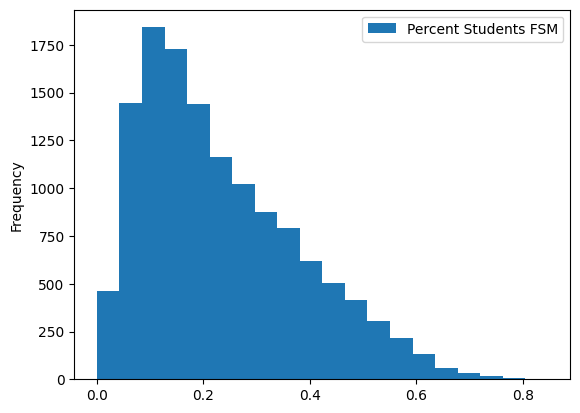

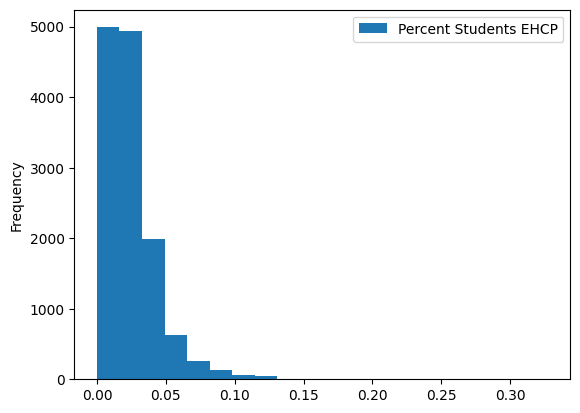

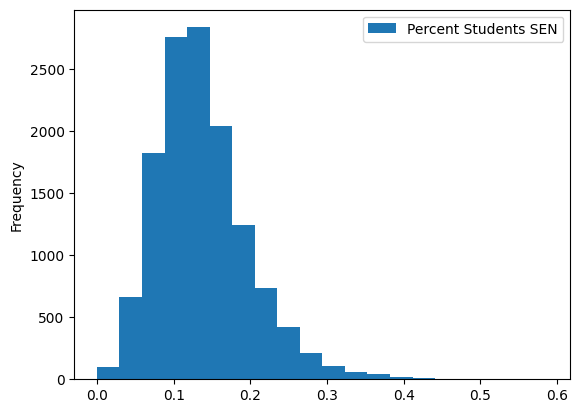

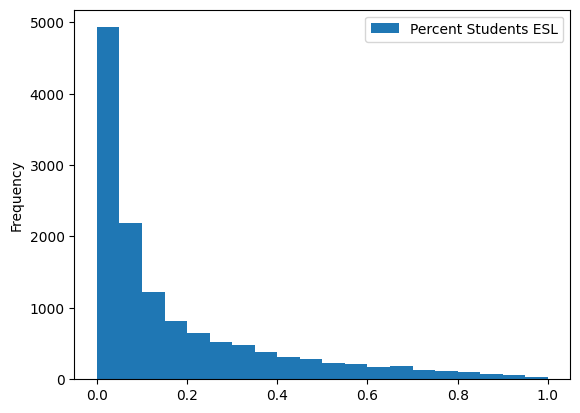

In [617]:
df[['Percent Students FSM']].plot.hist(bins=20)
df[['Percent Students EHCP']].plot.hist(bins=20)
df[['Percent Students SEN']].plot.hist(bins=20)
df[['Percent Students ESL']].plot.hist(bins=20)

In [618]:
def plot_student_groups(col): 
    df.plot.scatter(x='Percent Students FSM', y=col, c='FTE Students')
    print(f"Correlation '{col}' to 'Percent Students FSM': {df[col].corr(df['Percent Students FSM'])}" )
    df.plot.scatter(x='Percent Students EHCP', y=col, c='FTE Students')
    print(f"Correlation '{col}' to 'Percent Students EHCP':  {df[col].corr(df['Percent Students EHCP'])}" )
    df.plot.scatter(x='Percent Students SEN', y=col, c='FTE Students')
    print(f"Correlation '{col}' to 'Percent Students SEN':  {df[col].corr(df['Percent Students SEN'])}" )
    df.plot.scatter(x='Percent Students ESL', y=col, c='FTE Students')
    print(f"Correlation '{col}' to 'Percent Students ESL':  {df[col].corr(df['Percent Students ESL'])}" )    

Correlation 'Total Staff Costs vs Total Expenditure Ratio' to 'Percent Students FSM': -0.03437955537710687
Correlation 'Total Staff Costs vs Total Expenditure Ratio' to 'Percent Students EHCP':  0.06507517419967263
Correlation 'Total Staff Costs vs Total Expenditure Ratio' to 'Percent Students SEN':  -0.027365886513413668
Correlation 'Total Staff Costs vs Total Expenditure Ratio' to 'Percent Students ESL':  0.023964106712495572


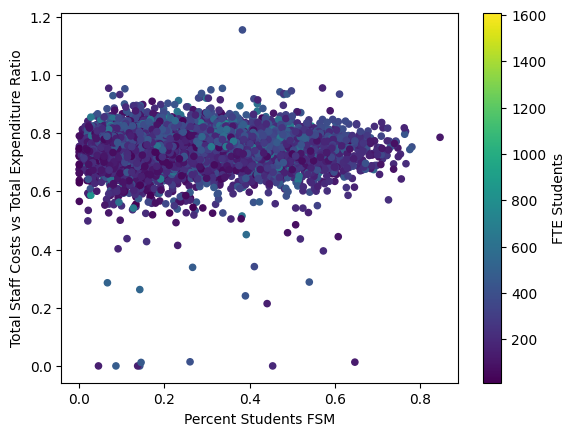

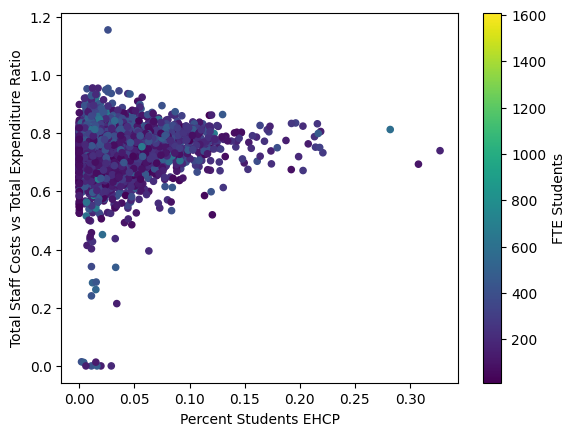

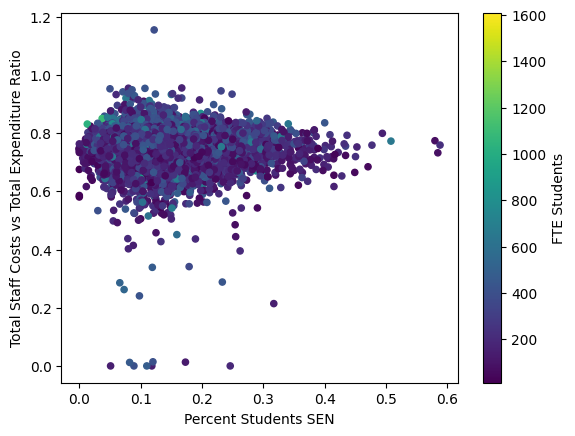

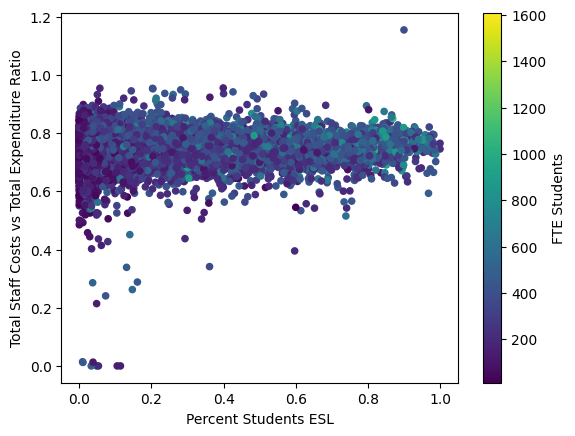

In [619]:
plot_student_groups('Total Staff Costs vs Total Expenditure Ratio')


Correlation 'Teaching Staff vs Total Expenditure Ratio' to 'Percent Students FSM': -0.22226620508933284
Correlation 'Teaching Staff vs Total Expenditure Ratio' to 'Percent Students EHCP':  -0.14818835033297287
Correlation 'Teaching Staff vs Total Expenditure Ratio' to 'Percent Students SEN':  -0.1386577684306223
Correlation 'Teaching Staff vs Total Expenditure Ratio' to 'Percent Students ESL':  -0.10816822410610762
Correlation 'Teaching Staff vs Staff Cost Ratio' to 'Percent Students FSM': -0.22226620508933284
Correlation 'Teaching Staff vs Staff Cost Ratio' to 'Percent Students EHCP':  -0.14818835033297287
Correlation 'Teaching Staff vs Staff Cost Ratio' to 'Percent Students SEN':  -0.1386577684306223
Correlation 'Teaching Staff vs Staff Cost Ratio' to 'Percent Students ESL':  -0.10816822410610762


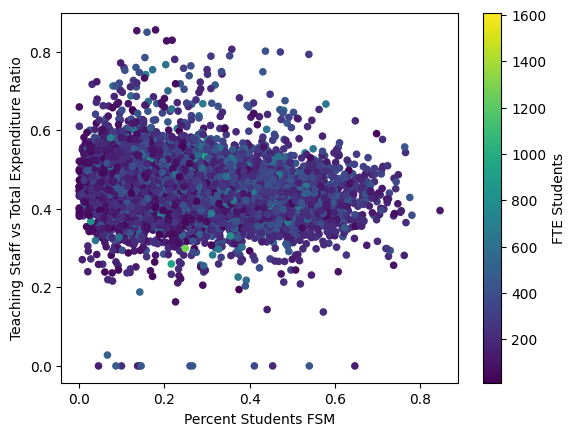

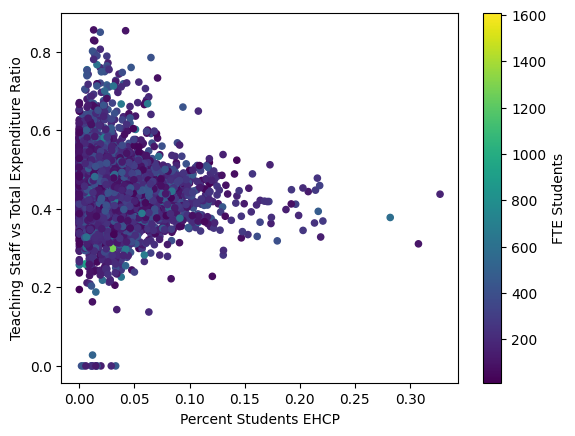

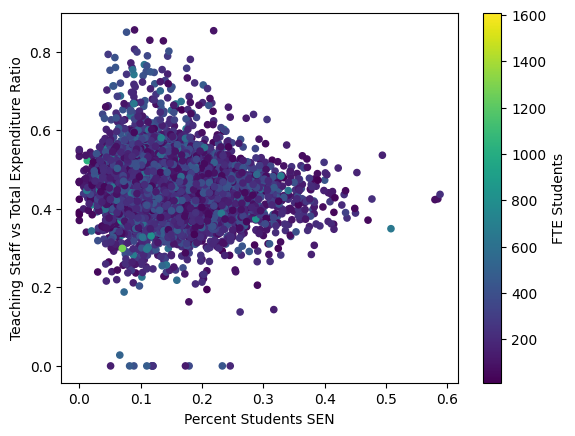

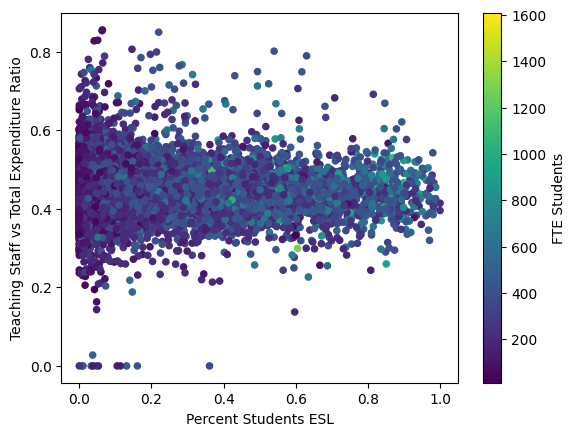

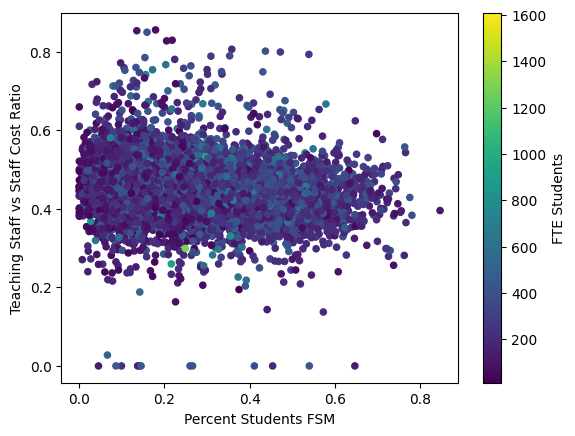

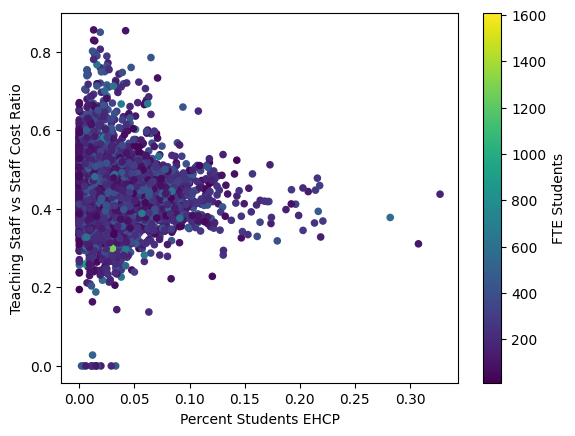

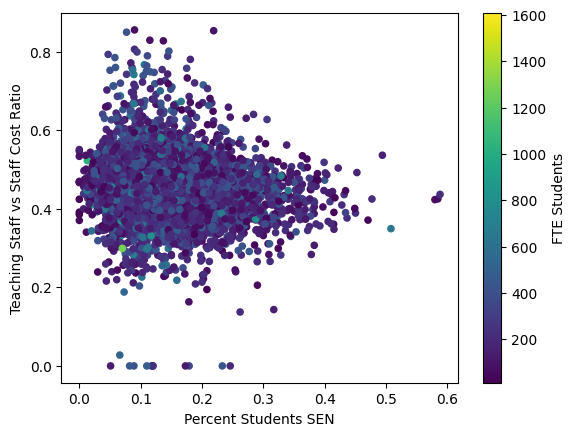

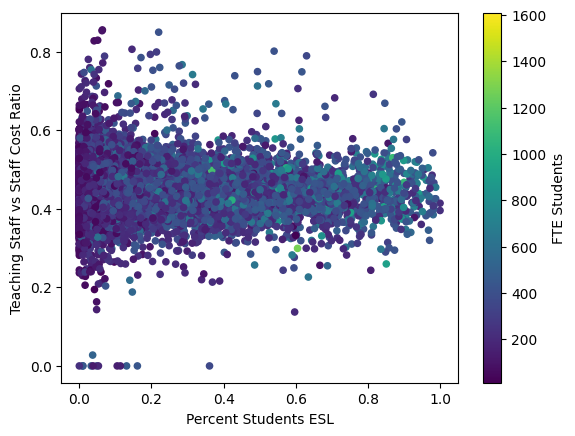

In [620]:
plot_student_groups('Teaching Staff vs Total Expenditure Ratio')
plot_student_groups('Teaching Staff vs Staff Cost Ratio')

Correlation 'Education support staff vs Total Expenditure Ratio' to 'Percent Students FSM': 0.1864896238621027
Correlation 'Education support staff vs Total Expenditure Ratio' to 'Percent Students EHCP':  0.25434743542390625
Correlation 'Education support staff vs Total Expenditure Ratio' to 'Percent Students SEN':  0.10946735407476406
Correlation 'Education support staff vs Total Expenditure Ratio' to 'Percent Students ESL':  0.0939252345693462
Correlation 'Education support staff vs Staff Cost Ratio' to 'Percent Students FSM': 0.1864896238621027
Correlation 'Education support staff vs Staff Cost Ratio' to 'Percent Students EHCP':  0.25434743542390625
Correlation 'Education support staff vs Staff Cost Ratio' to 'Percent Students SEN':  0.10946735407476406
Correlation 'Education support staff vs Staff Cost Ratio' to 'Percent Students ESL':  0.0939252345693462


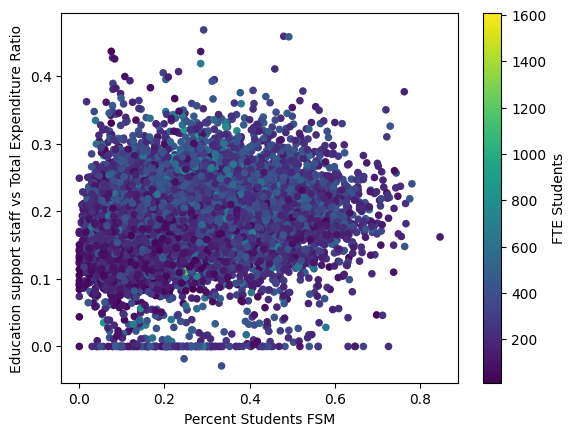

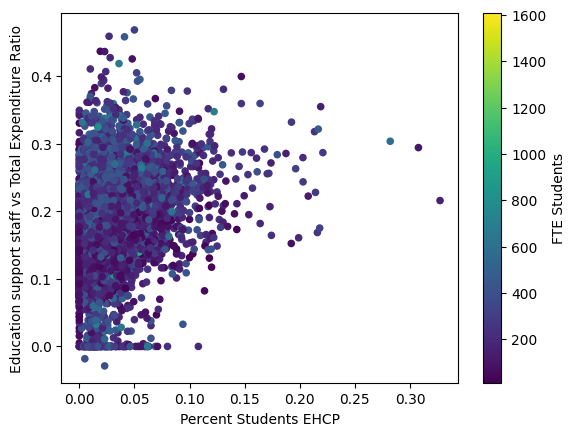

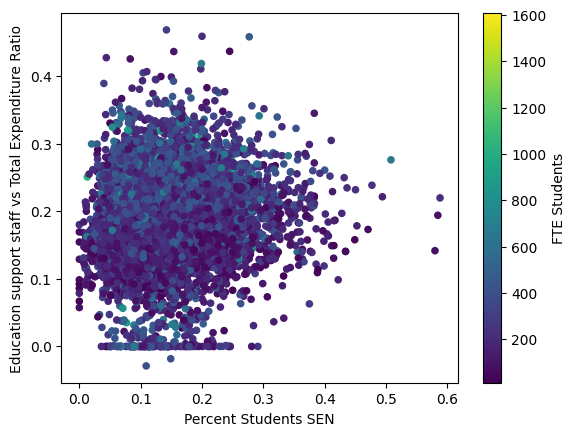

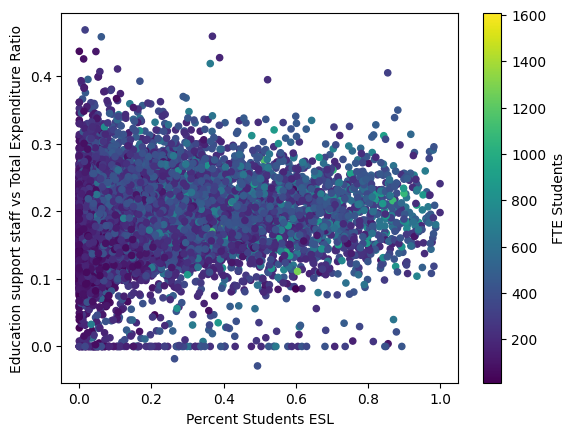

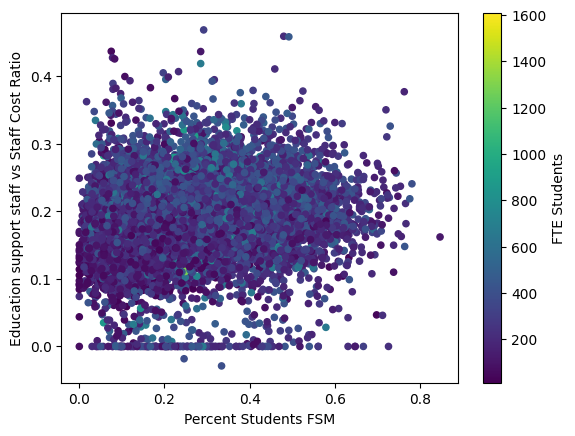

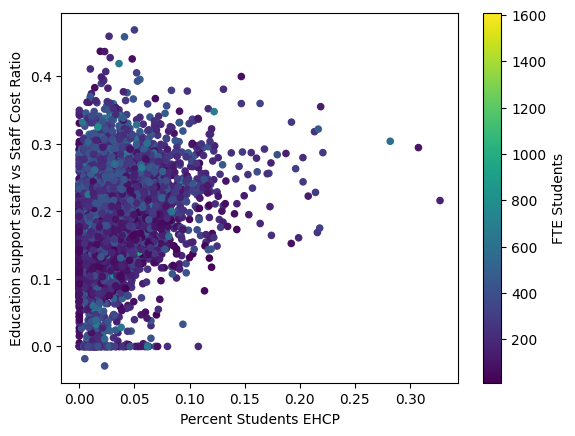

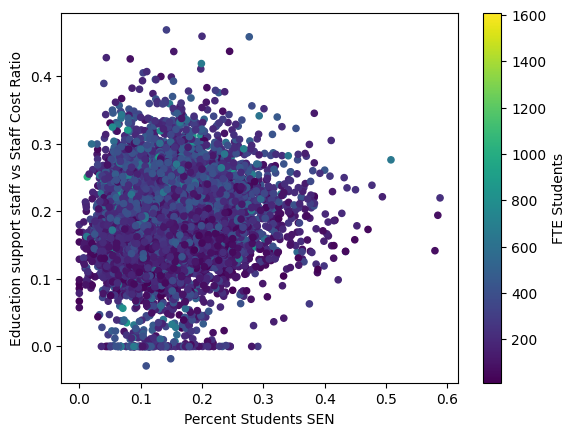

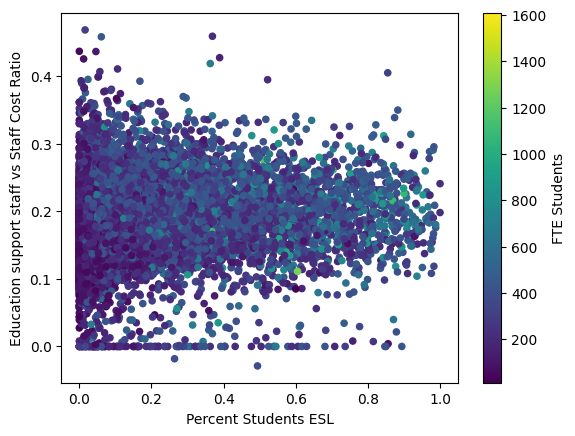

In [621]:
plot_student_groups('Education support staff vs Total Expenditure Ratio')
plot_student_groups('Education support staff vs Staff Cost Ratio')

Correlation 'Other Staff Costs vs Total Expenditure Ratio' to 'Percent Students FSM': -0.052936729286265
Correlation 'Other Staff Costs vs Total Expenditure Ratio' to 'Percent Students EHCP':  -0.04462418275485848
Correlation 'Other Staff Costs vs Total Expenditure Ratio' to 'Percent Students SEN':  -0.03444218915297466
Correlation 'Other Staff Costs vs Total Expenditure Ratio' to 'Percent Students ESL':  -0.04196588577130081
Correlation 'Other Staff Costs vs Staff Cost Ratio' to 'Percent Students FSM': -0.052936729286265
Correlation 'Other Staff Costs vs Staff Cost Ratio' to 'Percent Students EHCP':  -0.04462418275485848
Correlation 'Other Staff Costs vs Staff Cost Ratio' to 'Percent Students SEN':  -0.03444218915297466
Correlation 'Other Staff Costs vs Staff Cost Ratio' to 'Percent Students ESL':  -0.04196588577130081


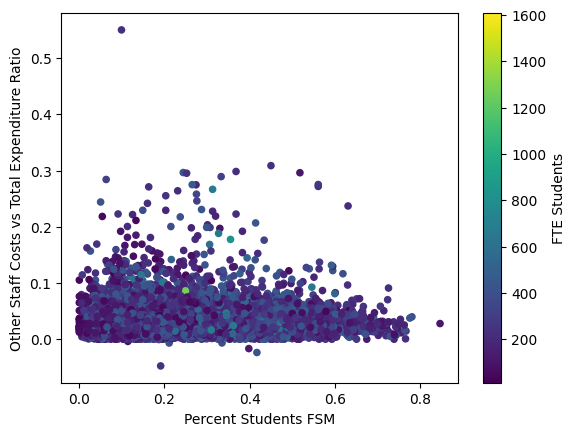

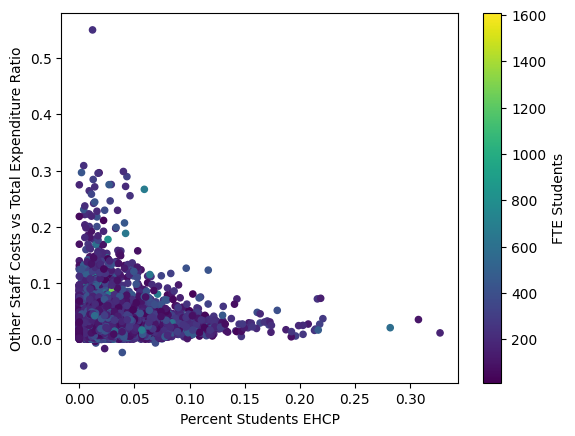

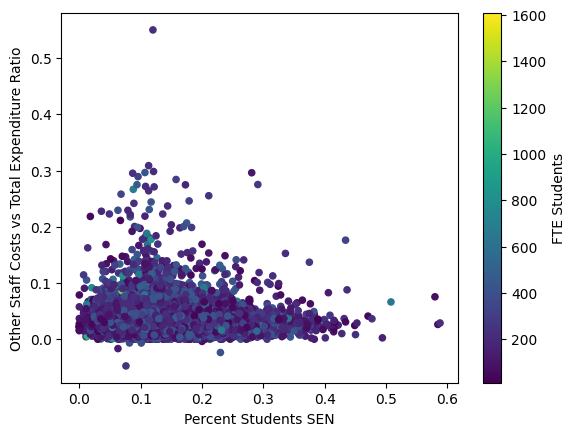

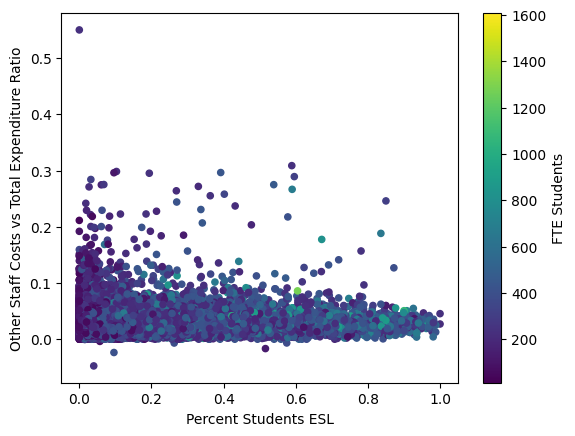

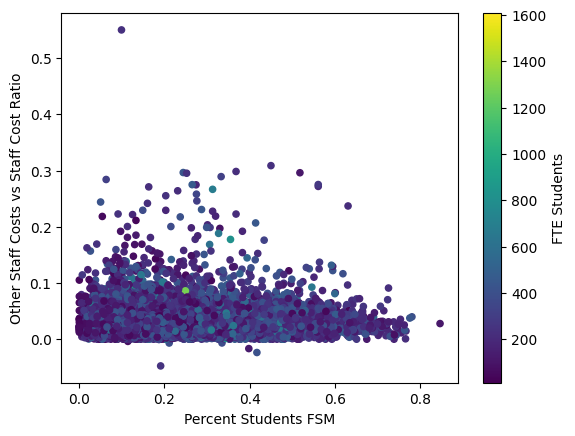

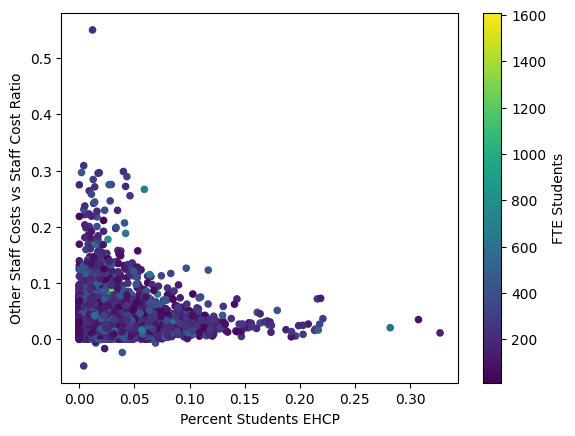

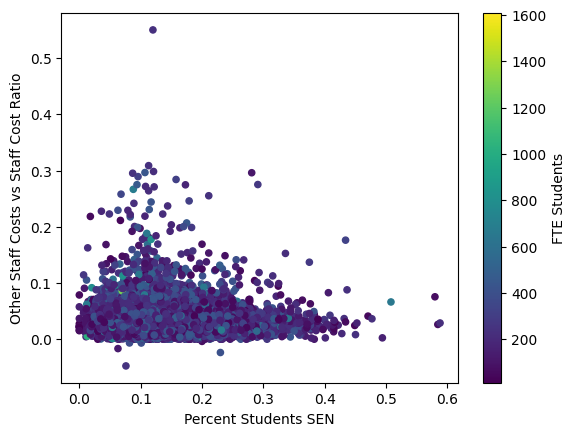

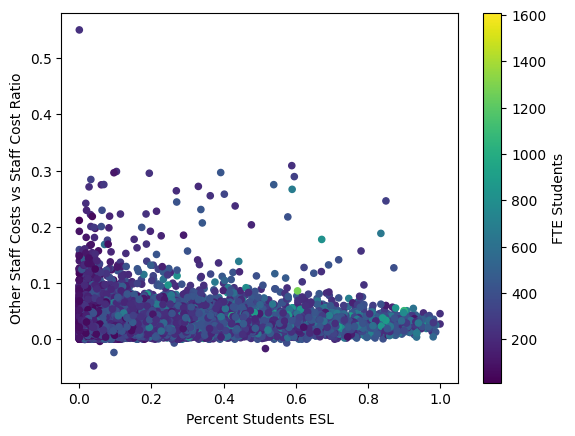

In [622]:
plot_student_groups('Other Staff Costs vs Total Expenditure Ratio')
plot_student_groups('Other Staff Costs vs Staff Cost Ratio')

Correlation 'Total Costs of Educational Supplies vs Total Expenditure Ratio' to 'Percent Students FSM': -0.14349407541030304
Correlation 'Total Costs of Educational Supplies vs Total Expenditure Ratio' to 'Percent Students EHCP':  -0.07894106047507471
Correlation 'Total Costs of Educational Supplies vs Total Expenditure Ratio' to 'Percent Students SEN':  -0.05048261888812488
Correlation 'Total Costs of Educational Supplies vs Total Expenditure Ratio' to 'Percent Students ESL':  -0.1872924280990615


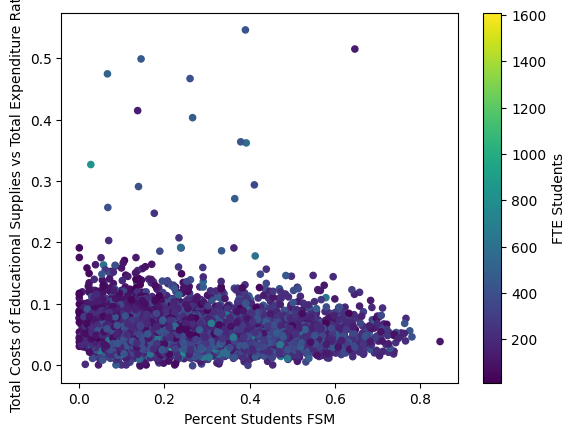

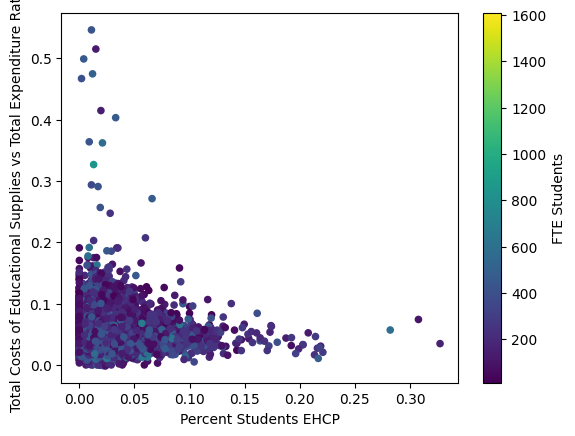

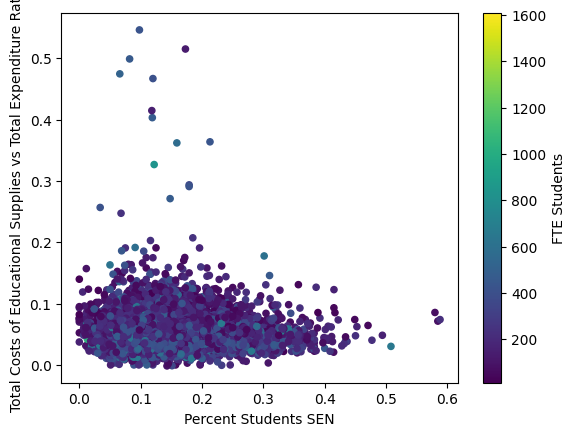

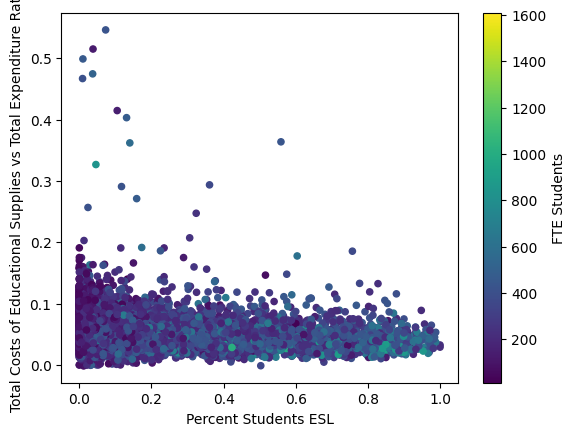

In [623]:
plot_student_groups('Total Costs of Educational Supplies vs Total Expenditure Ratio')

<Axes: xlabel='Total Income', ylabel='Total Expenditure'>

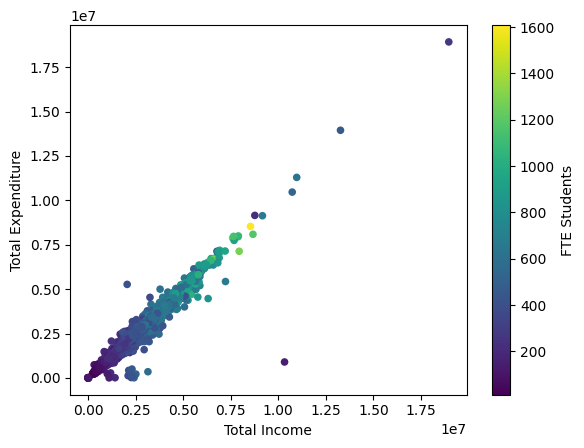

In [624]:
df.plot.scatter(x='Total Income', y='Total Expenditure', c='FTE Students')

In [625]:
df['Total Expenditure'].corr(df['Total Income'])

0.9858743561469057

In [626]:
df['Classroom Staff'] = df['Teaching Staff'] + df['Supply Staff Costs'] + df['Education support staff']
df['Non Classroom Staff'] = df['Total Staff Costs'] - df['Classroom Staff']
df[['URN', 'School Name', 'Classroom Staff', 'Total Staff Costs', 'Other Staff Costs']]

URN                               School Name  Classroom Staff  \
0      141534.0                  Dartford Primary Academy       2116000.00   
1      142188.0  Langley Park Primary Academy - Maidstone       1682000.00   
2      147866.0                  Bearsted Primary Academy        627000.00   
3      148116.0                    Marden Primary Academy       1033000.00   
4      137990.0              High Halstow Primary Academy        646000.00   
...         ...                                       ...              ...   
13084  123497.0              Rushbury CofE Primary School        254822.89   
13085  117195.0              Saffron Green Primary School        807861.87   
13086  120465.0        Nettleton Community Primary School        354166.10   
13087  123025.0           North Kidlington Primary School       1154656.42   
13088  125584.0              High Meadow Community School        663918.49   

       Total Staff Costs  Other Staff Costs  
0             2300000.00          119000.00  
1             1803000.00           75000.00  
2              688000.00           26000.00  
3             1156000.00           83000.00  
4              700000.00           16000.00  
...                  ...                ...  
13084          301028.24           12903.12  
13085          910602.49           22863.65  
13086          471635.95           88425.22  
13087         1297976.38           70489.63  
13088          728448.36           21741.47  

[13089 rows x 5 columns]

<Axes: xlabel='Classroom Staff', ylabel='Non Classroom Staff'>

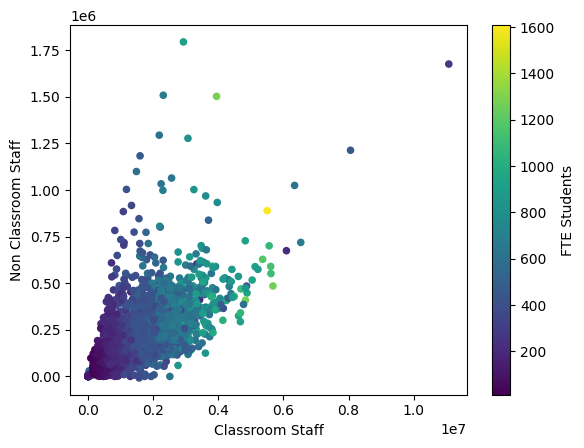

In [627]:
df.plot.scatter(x='Classroom Staff', y='Non Classroom Staff', c='FTE Students')

In [628]:
df['Non Classroom Staff'].corr(df['Total Expenditure'])

0.7873087368738951

<Axes: xlabel='Total Expenditure', ylabel='Teaching Staff'>

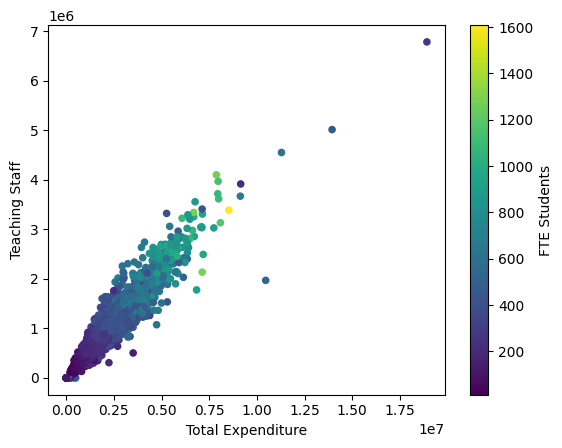

In [629]:
df.plot.scatter(x='Total Expenditure', y='Teaching Staff', c='FTE Students')

In [630]:
df['Teaching Staff'].corr(df['Total Expenditure'])

0.9655119728219124

In [631]:
def show_stats (col):
    agg_func_math = {
        col + ' vs Total Expenditure Ratio':
        ['mean', 'median', 'min', 'max', 'std', 'var']
    }
    return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)

show_stats('Teaching Staff')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Teaching Staff vs Total Expenditure Ratio                     \
                                                     mean median   min   max   
Student Buckets                                                                
200                                                  0.46   0.46  0.14  0.86   
400                                                  0.45   0.45  0.14  0.81   
600                                                  0.46   0.46  0.03  0.85   
800                                                  0.46   0.46  0.23  0.77   
1000                                                 0.46   0.46  0.26  0.58   
1200                                                 0.46   0.45  0.39  0.53   
1400                                                 0.44   0.50  0.30  0.52   
1600                                                 0.40   0.40  0.40  0.40   

                             
                  std   var  
Student Buckets              
200              0.06  0.00  
400              0.06  0.00  
600              0.06  0.00  
800              0.06  0.00  
1000             0.06  0.00  
1200             0.04  0.00  
1400             0.12  0.01  
1600              NaN   NaN

<Axes: xlabel='Total Expenditure', ylabel='Education support staff'>

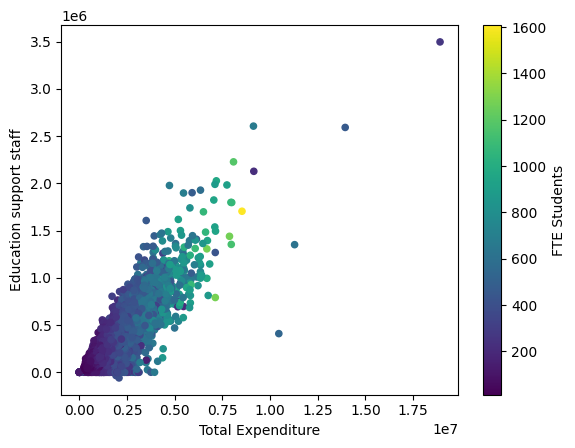

In [632]:

df.plot.scatter(x='Total Expenditure', y='Education support staff', c='FTE Students')

In [633]:
df['Education support staff'].corr(df['Total Expenditure'])

0.8885664017013882

In [634]:
show_stats('Education support staff')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Education support staff vs Total Expenditure Ratio         \
                                                              mean median   
Student Buckets                                                             
200                                                           0.17   0.17   
400                                                           0.19   0.19   
600                                                           0.20   0.20   
800                                                           0.20   0.20   
1000                                                          0.19   0.19   
1200                                                          0.22   0.22   
1400                                                          0.16   0.18   
1600                                                          0.20   0.20   

                                        
                  min   max   std  var  
Student Buckets                         
200              0.00  0.44  0.05  0.0  
400              0.00  0.47  0.05  0.0  
600              0.00  0.46  0.05  0.0  
800              0.01  0.42  0.05  0.0  
1000             0.04  0.32  0.06  0.0  
1200             0.16  0.28  0.04  0.0  
1400             0.11  0.20  0.05  0.0  
1600             0.20  0.20   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Total Staff Costs'>

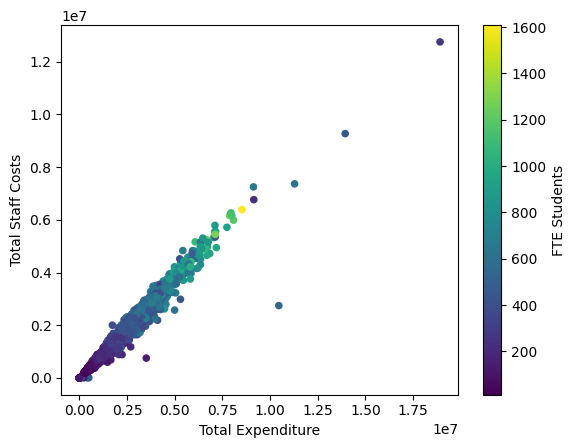

In [635]:

df.plot.scatter(x='Total Expenditure', y='Total Staff Costs', c='FTE Students')

In [636]:
df['Total Staff Costs'].corr(df['Total Expenditure'])

0.9896638480986727

In [637]:
show_stats('Total Staff Costs')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Total Staff Costs vs Total Expenditure Ratio               \
                                                        mean median   min   
Student Buckets                                                             
200                                                     0.74   0.75  0.01   
400                                                     0.75   0.76  0.34   
600                                                     0.76   0.77  0.01   
800                                                     0.77   0.77  0.52   
1000                                                    0.76   0.76  0.59   
1200                                                    0.78   0.77  0.72   
1400                                                    0.78   0.78  0.76   
1600                                                    0.75   0.75  0.75   

                                  
                  max   std  var  
Student Buckets                   
200              0.96  0.05  0.0  
400              1.15  0.05  0.0  
600              0.95  0.05  0.0  
800              0.92  0.05  0.0  
1000             0.87  0.05  0.0  
1200             0.85  0.04  0.0  
1400             0.78  0.01  0.0  
1600             0.75   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Maintenance & Improvement Costs'>

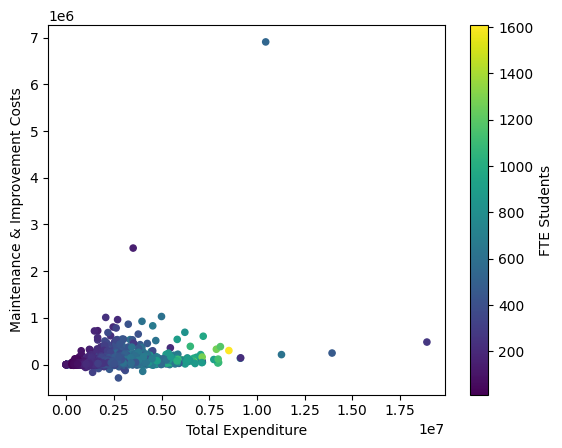

In [638]:

df.plot.scatter(x='Total Expenditure', y='Maintenance & Improvement Costs', c='FTE Students')

In [639]:
df['Maintenance & Improvement Costs'].corr(df['Total Expenditure'])

0.29975395599054344

In [640]:
show_stats('Maintenance & Improvement Costs')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Maintenance & Improvement Costs vs Total Expenditure Ratio  \
                                                                      mean   
Student Buckets                                                              
200                                                           0.02           
400                                                           0.02           
600                                                           0.02           
800                                                           0.02           
1000                                                          0.02           
1200                                                          0.02           
1400                                                          0.02           
1600                                                          0.04           

                                               
                median   min   max   std  var  
Student Buckets                                
200               0.02  0.00  0.71  0.03  0.0  
400               0.02  0.00  0.49  0.02  0.0  
600               0.02  0.00  0.66  0.02  0.0  
800               0.01  0.00  0.23  0.02  0.0  
1000              0.01  0.00  0.11  0.02  0.0  
1200              0.01  0.00  0.06  0.02  0.0  
1400              0.02  0.01  0.04  0.02  0.0  
1600              0.04  0.04  0.04   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Energy'>

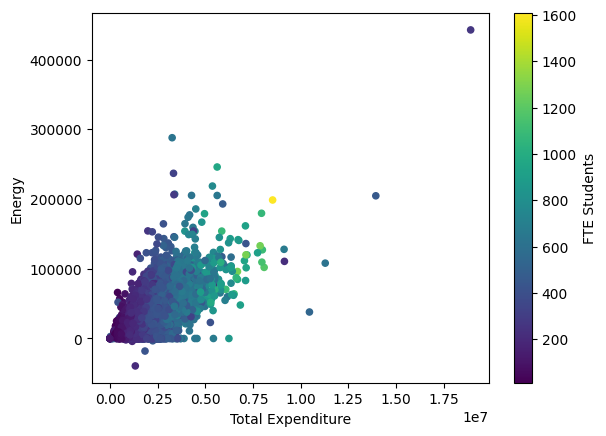

In [641]:

df.plot.scatter(x='Total Expenditure', y='Energy', c='FTE Students')

In [642]:
df['Energy'].corr(df['Total Expenditure'])

0.7100673286421343

In [643]:
df['Energy'].corr(df['FTE Students'])

0.6099088241401475

In [644]:
show_stats('Energy')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Energy vs Total Expenditure Ratio                           \
                                             mean median   min   max   std   
Student Buckets                                                              
200                                          0.02   0.02  0.00  0.16  0.01   
400                                          0.02   0.02  0.00  0.08  0.01   
600                                          0.02   0.02  0.00  0.12  0.01   
800                                          0.02   0.02  0.00  0.09  0.01   
1000                                         0.02   0.02  0.01  0.04  0.01   
1200                                         0.02   0.01  0.01  0.03  0.01   
1400                                         0.02   0.02  0.01  0.02  0.00   
1600                                         0.02   0.02  0.02  0.02   NaN   

                      
                 var  
Student Buckets       
200              0.0  
400              0.0  
600              0.0  
800              0.0  
1000             0.0  
1200             0.0  
1400             0.0  
1600             NaN

<Axes: xlabel='Total Expenditure', ylabel='Total Costs of Educational Supplies'>

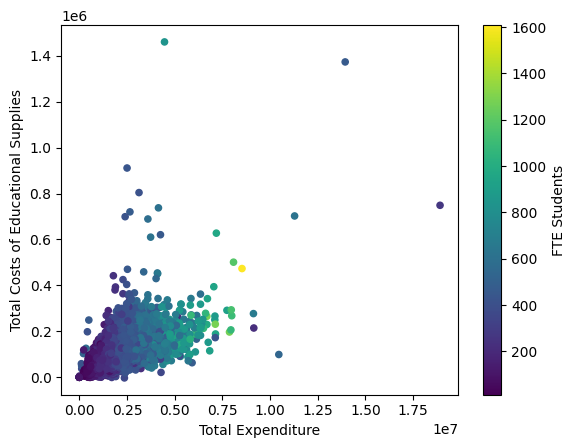

In [645]:

df.plot.scatter(x='Total Expenditure', y='Total Costs of Educational Supplies', c='FTE Students')

In [646]:
df['Total Costs of Educational Supplies'].corr(df['Total Expenditure'])

0.6913153403155395

In [647]:
df['Total Costs of Educational Supplies'].corr(df['FTE Students'])

0.6476949098600314

In [648]:
show_stats('Total Costs of Educational Supplies')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Total Costs of Educational Supplies vs Total Expenditure Ratio  \
                                                                          mean   
Student Buckets                                                                  
200                                                           0.06               
400                                                           0.05               
600                                                           0.05               
800                                                           0.04               
1000                                                          0.04               
1200                                                          0.04               
1400                                                          0.03               
1600                                                          0.06               

                                               
                median   min   max   std  var  
Student Buckets                                
200               0.05  0.00  0.52  0.02  0.0  
400               0.05  0.00  0.29  0.02  0.0  
600               0.05  0.01  0.55  0.03  0.0  
800               0.04  0.01  0.18  0.02  0.0  
1000              0.04  0.02  0.33  0.04  0.0  
1200              0.03  0.03  0.06  0.01  0.0  
1400              0.03  0.03  0.04  0.01  0.0  
1600              0.06  0.06  0.06   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Catering supplies'>

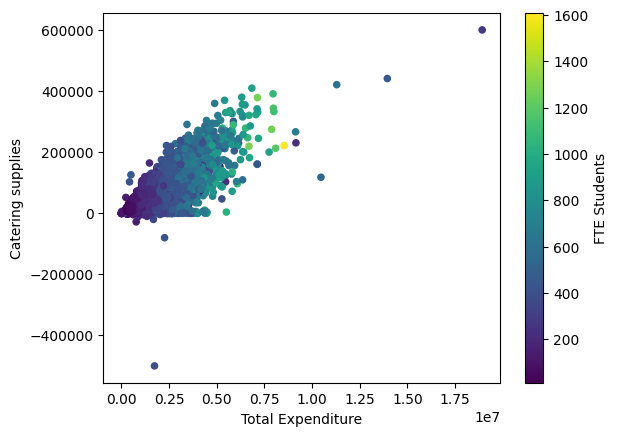

In [649]:

df.plot.scatter(x='Total Expenditure', y='Catering supplies', c='FTE Students')

In [650]:
df['Catering supplies'].corr(df['Total Expenditure'])

0.77802806217452

In [651]:
df['Catering supplies'].corr(df['FTE Students'])

0.707788464691151

In [652]:
show_stats("Catering supplies")

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Catering supplies vs Total Expenditure Ratio               \
                                                        mean median   min   
Student Buckets                                                             
200                                                     0.04   0.04  0.00   
400                                                     0.04   0.04  0.00   
600                                                     0.04   0.04  0.00   
800                                                     0.04   0.04  0.00   
1000                                                    0.04   0.04  0.00   
1200                                                    0.03   0.04  0.00   
1400                                                    0.04   0.03  0.03   
1600                                                    0.03   0.03  0.03   

                                  
                  max   std  var  
Student Buckets                   
200              0.60  0.02  0.0  
400              0.11  0.01  0.0  
600              0.25  0.02  0.0  
800              0.08  0.01  0.0  
1000             0.07  0.01  0.0  
1200             0.05  0.02  0.0  
1400             0.05  0.01  0.0  
1600             0.03   NaN  NaN

In [653]:
df[['READPROG', 'WRITPROG', 'MATPROG']].isna().sum()

READPROG    0
WRITPROG    0
MATPROG     0
dtype: int64

In [654]:
# Start working with progress
df['Progress'] = (df['READPROG'] + df['WRITPROG'] + df['MATPROG']) / 3

Text(0, 0.5, 'Number of Schools')

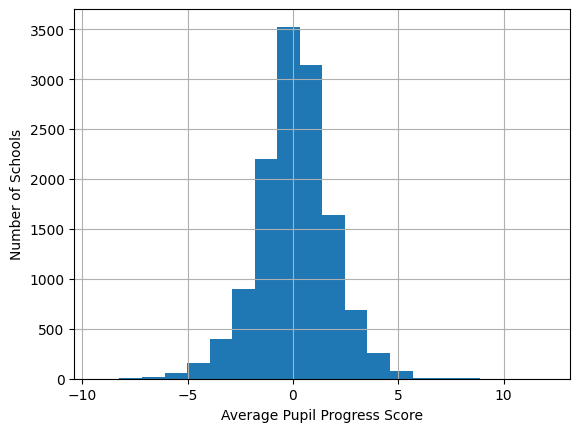

In [655]:
ax = df['Progress'].hist(bins=20)
ax.set_xlabel('Average Pupil Progress Score')
ax.set_ylabel('Number of Schools')

In [656]:
print('Mean Progress:', df['Progress'].mean())
print('Median Progress:', df['Progress'].median())
print('Min Progress:', df['Progress'].min())
print('Max Progress:', df['Progress'].max())

Mean Progress: 0.10938956375582552
Median Progress: 0.06666666666666672
Min Progress: -9.299999999999999
Max Progress: 12.1


Correlation 'Progress' to 'Percent Students FSM': -0.11240206372313005
Correlation 'Progress' to 'Percent Students EHCP':  -0.07107492207721183
Correlation 'Progress' to 'Percent Students SEN':  -0.12263417620808299
Correlation 'Progress' to 'Percent Students ESL':  0.1627002659746943


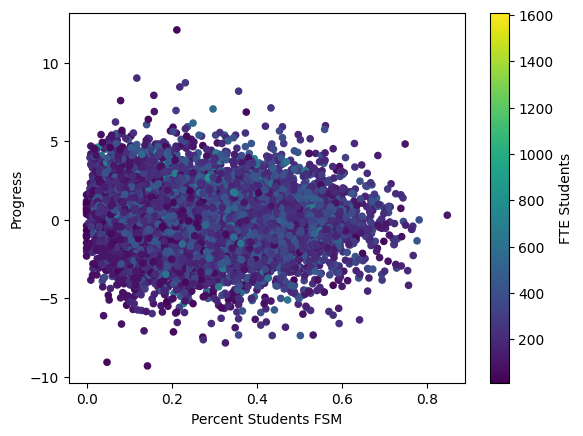

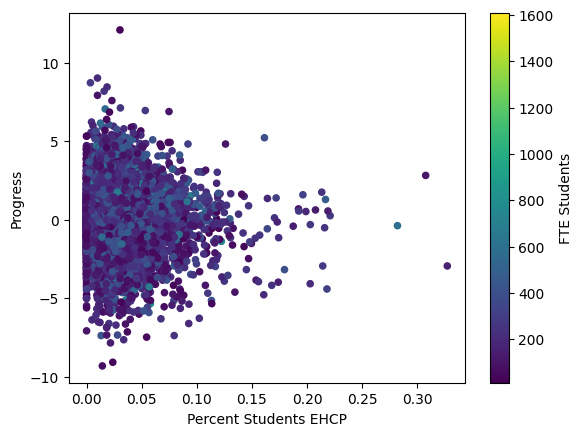

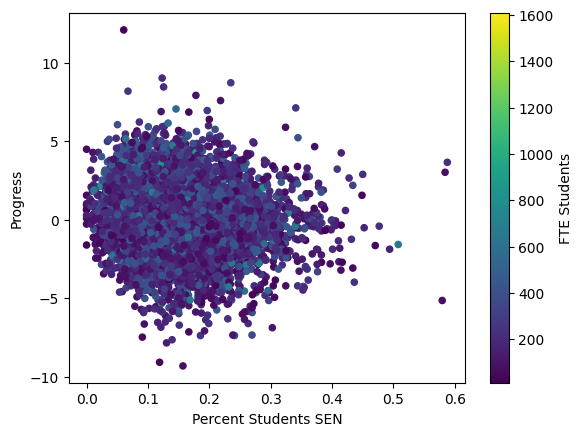

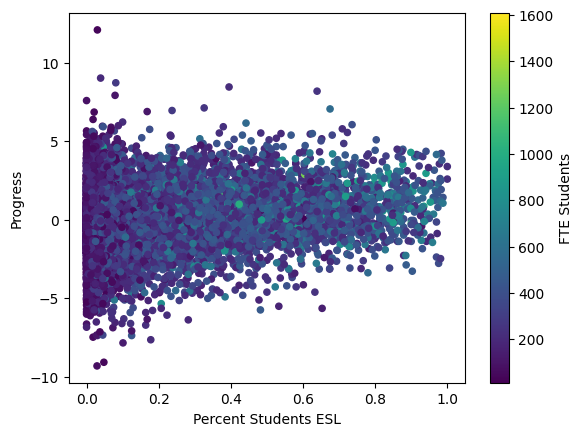

In [657]:
plot_student_groups('Progress')

<Axes: xlabel='Total Expenditure vs FTE Students Ratio', ylabel='Progress'>

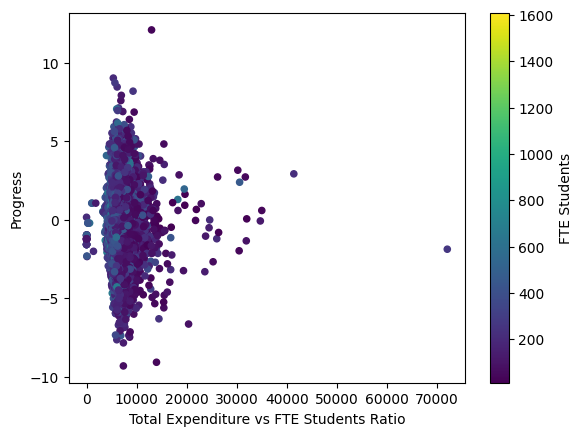

In [658]:
df.plot.scatter(x='Total Expenditure vs FTE Students Ratio', y='Progress', c='FTE Students')

<Axes: xlabel='IE Ratio', ylabel='Progress'>

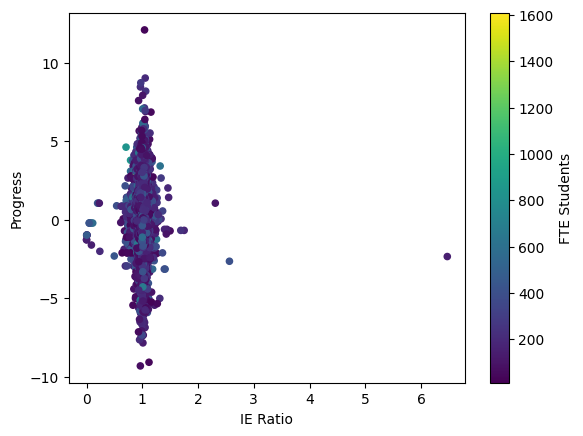

In [659]:
df.plot.scatter(x='IE Ratio', y='Progress', c='FTE Students')

<Axes: xlabel='Total Expenditure vs FTE Students Ratio', ylabel='Progress'>

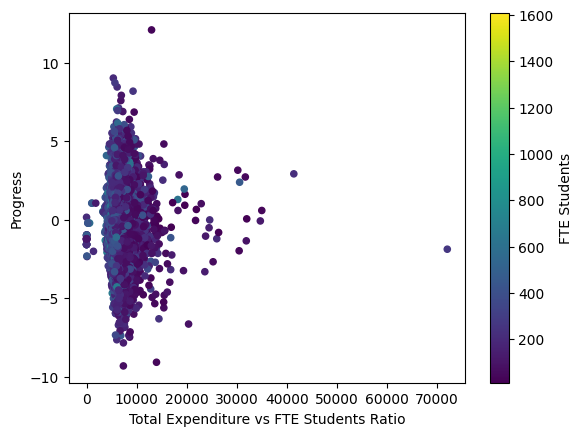

In [661]:
df.plot.scatter(x='Total Expenditure vs FTE Students Ratio', y='Progress', c='FTE Students')

In [666]:
df['Total Expenditure vs FTE Students Ratio'].corr(df['Progress'])

-0.028824361636826487

<Axes: xlabel='Other Staff Costs vs FTE Students Ratio', ylabel='Progress'>

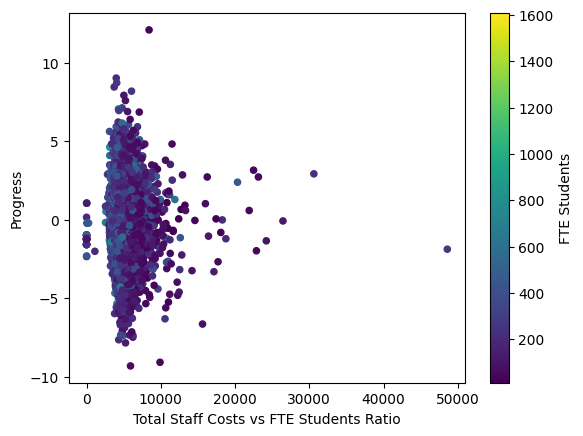

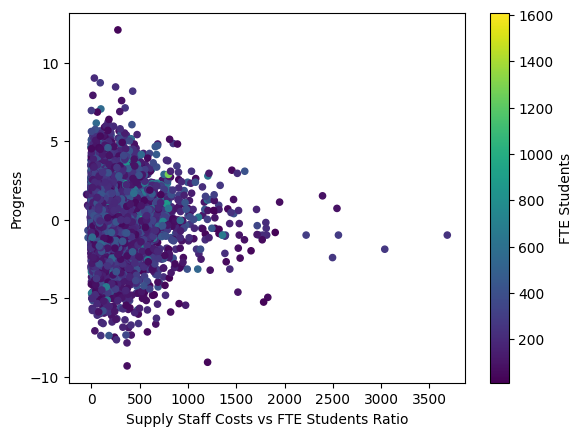

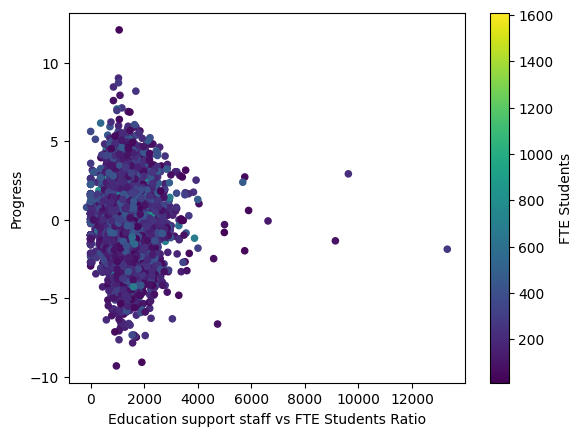

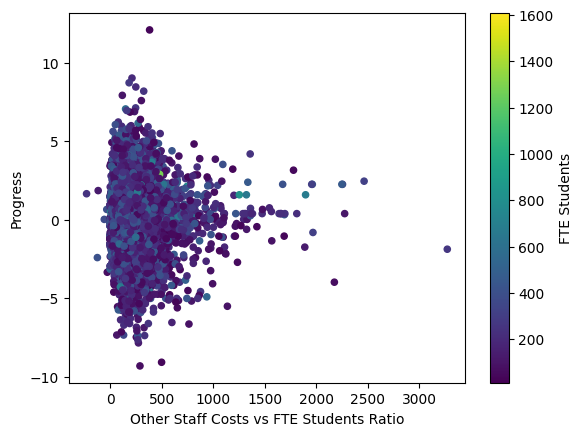

In [662]:
df.plot.scatter(x='Total Staff Costs vs FTE Students Ratio', y='Progress', c='FTE Students')
df.plot.scatter(x='Supply Staff Costs vs FTE Students Ratio', y='Progress', c='FTE Students')
df.plot.scatter(x='Education support staff vs FTE Students Ratio', y='Progress', c='FTE Students')
df.plot.scatter(x='Other Staff Costs vs FTE Students Ratio', y='Progress', c='FTE Students')


In [676]:
print('\'Total Staff Costs vs FTE Students Ratio\' vs Progess corr: '+ str(df['Total Staff Costs vs FTE Students Ratio'].corr(df['Progress'])))

'Total Staff Costs vs FTE Students Ratio' vs Progess corr: -0.042438343536714794


<Axes: xlabel='Catering supplies', ylabel='Progress'>

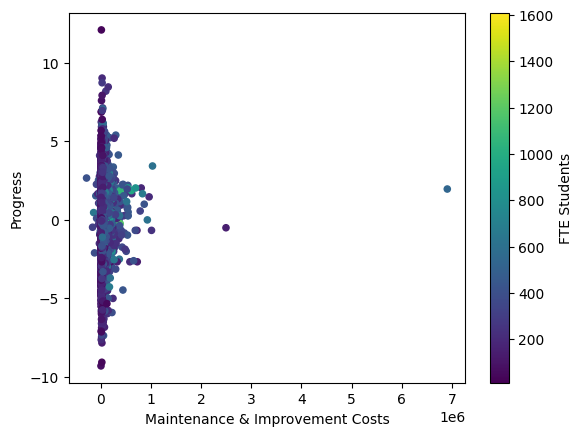

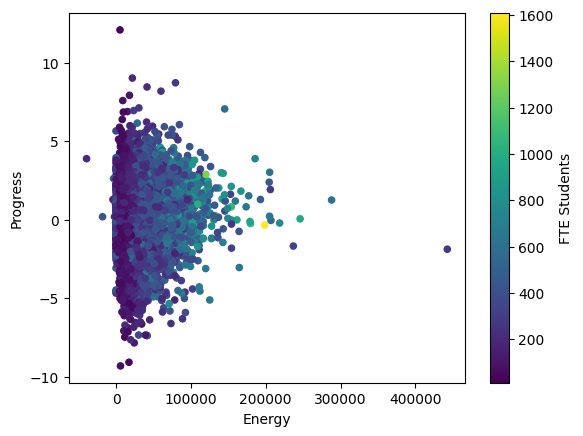

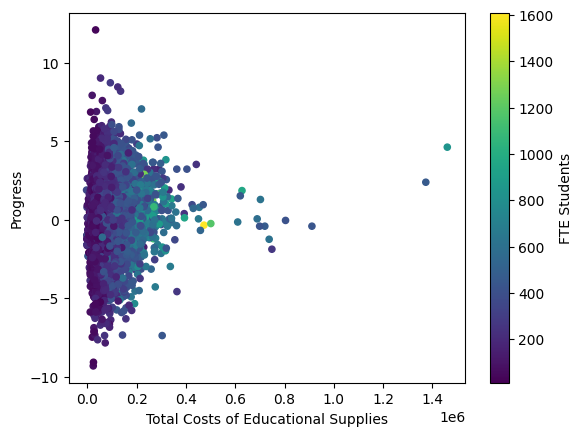

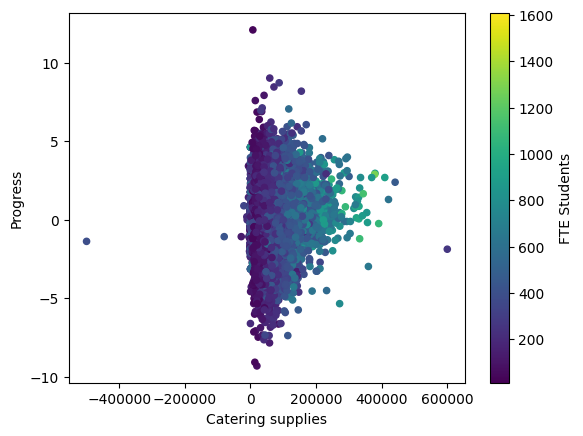

In [663]:

df.plot.scatter(x='Maintenance & Improvement Costs', y='Progress', c='FTE Students')
df.plot.scatter(x='Energy', y='Progress', c='FTE Students')
df.plot.scatter(x='Total Costs of Educational Supplies', y='Progress', c='FTE Students')
df.plot.scatter(x='Catering supplies', y='Progress', c='FTE Students')


In [679]:
print('Energy: ' + str(df['Energy'].corr(df['Progress'])))
print('Total Costs of Educational Supplies: ' + str(df['Total Costs of Educational Supplies'].corr(df['Progress'])))
print('Catering supplies: ' + str(df['Catering supplies'].corr(df['Progress'])))


Energy: 0.06571188896844309
Total Costs of Educational Supplies: 0.09088655473727485
Catering supplies: 0.10895415243409357


<Axes: xlabel='FTE Teachers', ylabel='Progress'>

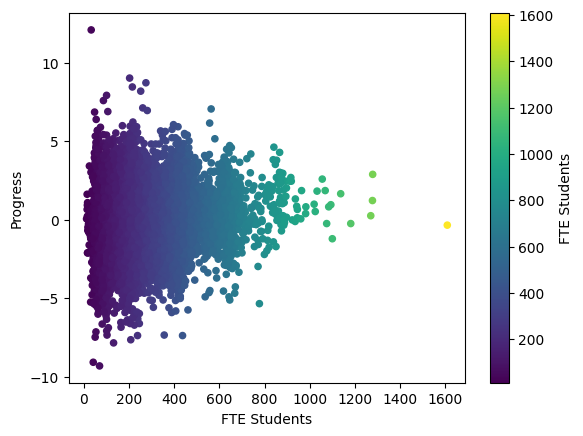

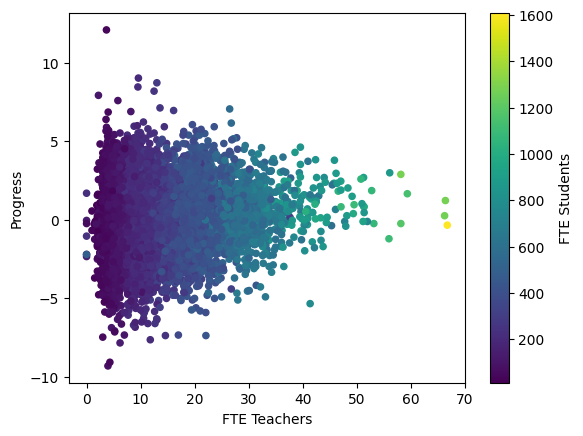

In [664]:
df.plot.scatter(x='FTE Students', y='Progress', c='FTE Students')
df.plot.scatter(x='FTE Teachers', y='Progress', c='FTE Students')


In [670]:
print('Corr FTE Students vs progress: ' + str(df['FTE Students'].corr(df['Progress'])))
print('Corr FTE Teachers vs progress: ' + str(df['FTE Teachers'].corr(df['Progress'])))

Corr FTE Students vs progress: 0.09745516114334862
Corr FTE Teachers vs progress: 0.09162195352450586


<Axes: xlabel='FTE Students', ylabel='Total Expenditure vs FTE Students Ratio'>

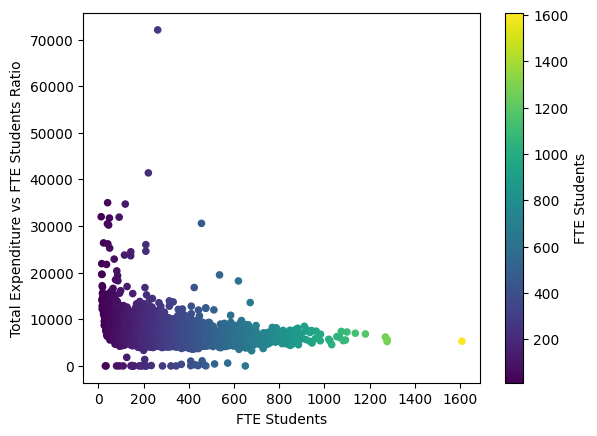

In [665]:
df.plot.scatter(x='FTE Students', y='Total Expenditure vs FTE Students Ratio', c='FTE Students')